Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

from BasicPRM import IPVISBasicPRM 
from BasicPRM import IPBasicPRM_Roundtrip

from VisibilityPRM import IPVisibilityPRM_Roundtrip
from VisibilityPRM import IPVISVisibilityPRM
from VisibilityPRM import Optimized_IPVisibilityPRM_Roundtrip
from VisibilityPRM import Grid_IPVisibilityPRM_Roundtrip
from VisibilityPRM import CC_IPVisibilityPRM_Roundtrip
from VisibilityPRM import Normal_IPVisibilityPRM_Roundtrip

from LazyPRM import IPLazyPRM_Roundtrip
from LazyPRM import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

#basicConfig = dict()
#basicConfig["radius"] = 3
#basicConfig["numNodes"] = 200
#plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


#visbilityConfig = dict()
#visbilityConfig["ntry"] = 300
#plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [Normal_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


#visbilityConfig = dict()
#visbilityConfig["ntry"] = 300
#plannerFactory["visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [Grid_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


#lazyConfig = dict()
#lazyConfig["initialRoadmapSize"] = 10
#lazyConfig["updateRoadmapSize"]  = 5
#lazyConfig["kNearest"] = 8
#plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/stand_13.1/RKIM23RobotProgramDS/02_eigeneNotebooks/IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[:]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')

    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)



        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

Ziel Interim:[[9, 15], 0.0, 'start']
Try Path: ['start']

While Schleife beginnt
TRYPATH : ['start']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[9, 15], 0.0, 'start']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[3, 9], 8.48528137423857, 'interim0']
Neuer Trypath:  [35, 'interim1', 'interim4', 'interim0']

While Schleife beginnt
TRYPATH : [35, 'interim1', 'interim4', 'interim0']

For-Schleife beginnt
Aktueller Node (step):  35


Nächstes Ziel-Interim:  [[20, 15], 6.519489069306946, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1', 'interim3']

While Schleife beginnt
TRYPATH : ['interim1', 'interim3']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[19, 8], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[20, 15], 7.0710678118654755, 'interim3']
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[20, 15], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[10, 1], 17.204650534085253, 'interim4']
Neuer Trypath:  ['interim1', 'interim4']

While Schleife beginnt
TRYPATH : ['interim1', 'interim4']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[10, 1], 11.40175425099138, 'interim4']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim4']

While Schleife beginnt
TRYPATH : ['interim4']

For-Schleife beginnt
Aktueller Node (step):  interim4


Nächstes Ziel-Interim:  [[10, 1], 0.0, 'interim4']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[3, 3], 7.280109889280518, 'interim2']
Neuer Trypath:  ['interim0', 'interim2']

While Schleife beginnt
TRYPATH : ['interim0', 'interim2']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[3, 9], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[3, 3], 6.0, 'interim2']
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[3, 3], 0.0, 'interim2']
Ziel-Interim erreicht


Ziel Interim:[[4, 15], 0.0, 'start']
Try Path: ['start']

While Schleife beginnt
TRYPATH : ['start']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[4, 15], 0.0, 'start']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[4, 4], 11.0, 'interim2']
Neuer Trypath:  ['interim1', 0, 'interim0', 'interim2']

While Schleife beginnt
TRYPATH : ['interim1', 0, 'interim0', 'interim2']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[18, 16], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 3], 13.0, 'interim0']
Neuer Trypath:  [0, 'interim0']

While Schleife beginnt
TRYPATH : [0, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[4, 4], 13.367683881317754, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0', 'interim2']

While Schleife beginnt
TRYPATH : ['interim0', 'interim2']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[18, 3], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 1], 2.0, 'interim3']
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[18, 1], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[4, 4], 14.317821063276353, 'interim2']
Neuer Trypath:  ['interim0', 'interim2']

While Schleife beginnt
TRYPATH : ['interim0', 'interim2']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[4, 4], 14.035668847618199, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[4, 4], 0.0, 'interim2']
Ziel-Interim erreicht


Ziel Interim:[[4, 21], 0.0, 'start']
Try Path: ['start']

While Schleife beginnt
TRYPATH : ['start']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[4, 21], 0.0, 'start']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 16], 14.866068747318506, 'interim2']
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[18, 16], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 4], 12.0, 'interim0']
Neuer Trypath:  [65, 35, 47, 'interim0']

While Schleife beginnt
TRYPATH : [65, 35, 47, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  65


Nächstes Ziel-Interim:  [[18, 4], 14.330223423493525, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [35, 47, 'interim0']

While Schleife beginnt
TRYPATH : [35, 47, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  35


Nächstes Ziel-Interim:  [[18, 4], 9.606002641240194, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [47, 'interim0']

While Schleife beginnt
TRYPATH : [47, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  47


Nächstes Ziel-Interim:  [[18, 4], 7.093229332528065, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[18, 4], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 1], 3.0, 'interim3']
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[18, 1], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[4, 4], 14.317821063276353, 'interim1']
Neuer Trypath:  ['interim0', 'interim1']

While Schleife beginnt
TRYPATH : ['interim0', 'interim1']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[4, 4], 14.0, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[4, 4], 0.0, 'interim1']
Ziel-Interim erreicht


Ziel Interim:[[1, 17.7], 0.0, 'start']
Try Path: ['start']

While Schleife beginnt
TRYPATH : ['start']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[1, 17.7], 0.0, 'start']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[10, 10], 11.84440796325422, 'interim0']
Neuer Trypath:  ['interim2', 1, 'interim0']

While Schleife beginnt
TRYPATH : ['interim2', 1, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[20, 18], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[17.25, 10], 8.459462157844316, 'interim3']
Neuer Trypath:  [1, 'interim0', 14, 'interim1', 12, 'interim3']

While Schleife beginnt
TRYPATH : [1, 'interim0', 14, 'interim1', 12, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[10, 10], 8.068947767116825, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[10, 10], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[17.25, 10], 7.25, 'interim3']
Neuer Trypath:  [14, 'interim1', 12, 'interim3']

While Schleife beginnt
TRYPATH : [14, 'interim1', 12, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  14


Nächstes Ziel-Interim:  [[15, 2], 12.169007503302266, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[15, 2], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[17.25, 10], 8.31038506929733, 'interim3']
Neuer Trypath:  [12, 'interim3']

While Schleife beginnt
TRYPATH : [12, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  12


Nächstes Ziel-Interim:  [[17.25, 10], 9.44096803678203, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[17.25, 10], 0.0, 'interim3']
Ziel-Interim erreicht


Ziel Interim:[[10, 10], 0.0, 'start']
Try Path: ['start']

While Schleife beginnt
TRYPATH : ['start']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[10, 10], 0.0, 'start']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[10, 7.5], 2.5, 'interim1']
Neuer Trypath:  [46, 40, 42, 'interim1']

While Schleife beginnt
TRYPATH : [46, 40, 42, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  46


Nächstes Ziel-Interim:  [[10, 7.5], 4.382295102960068, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [40, 42, 'interim1']

While Schleife beginnt
TRYPATH : [40, 42, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  40


Nächstes Ziel-Interim:  [[10, 7.5], 3.866076399815537, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [42, 'interim1']

While Schleife beginnt
TRYPATH : [42, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  42


Nächstes Ziel-Interim:  [[10, 7.5], 3.5214794668073086, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[10, 7.5], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[10, 4.5], 3.0, 'interim0']
Neuer Trypath:  [42, 40, 46, 'start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [42, 40, 46, 'start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  42


Nächstes Ziel-Interim:  [[10, 4.5], 5.080181172987316, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [40, 46, 'start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [40, 46, 'start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  40


Nächstes Ziel-Interim:  [[10, 4.5], 6.1632872567212935, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [46, 'start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [46, 'start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  46


Nächstes Ziel-Interim:  [[10, 4.5], 7.364353287442971, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : ['start', 135, 66, 71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[10, 4.5], 5.5, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [135, 66, 71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [135, 66, 71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  135


Nächstes Ziel-Interim:  [[10, 4.5], 9.211739480742981, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [66, 71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [66, 71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  66


Nächstes Ziel-Interim:  [[10, 4.5], 7.529413795239456, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [71, 29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [71, 29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  71


Nächstes Ziel-Interim:  [[10, 4.5], 8.673600374185568, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [29, 76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [29, 76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  29


Nächstes Ziel-Interim:  [[10, 4.5], 11.561880072624772, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [76, 5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [76, 5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  76


Nächstes Ziel-Interim:  [[10, 4.5], 11.020420406231478, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [5, 8, 'interim0']

While Schleife beginnt
TRYPATH : [5, 8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  5


Nächstes Ziel-Interim:  [[10, 4.5], 10.12649643484883, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [8, 'interim0']

While Schleife beginnt
TRYPATH : [8, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  8


Nächstes Ziel-Interim:  [[20, 3], 5.626860618234222, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [5, 11, 'interim2']

LOOP VERHINDERT
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[10, 4.5], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[1, 1], 9.656603957913983, 'interim3']
Neuer Trypath:  [8, 5, 11, 'interim2', 'interim3']

While Schleife beginnt
TRYPATH : [8, 5, 11, 'interim2', 'interim3']

For-Schleife beginnt
Aktueller Node (step):  8


Nächstes Ziel-Interim:  [[20, 3], 5.626860618234222, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [5, 11, 'interim2']

While Schleife beginnt
TRYPATH : [5, 11, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  5


Nächstes Ziel-Interim:  [[20, 3], 10.862876611186458, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [11, 'interim2']

While Schleife beginnt
TRYPATH : [11, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  11


Nächstes Ziel-Interim:  [[20, 3], 2.9105212218507264, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[20, 3], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[1, 1], 19.1049731745428, 'interim3']
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[1, 1], 0.0, 'interim3']
Ziel-Interim erreicht


/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


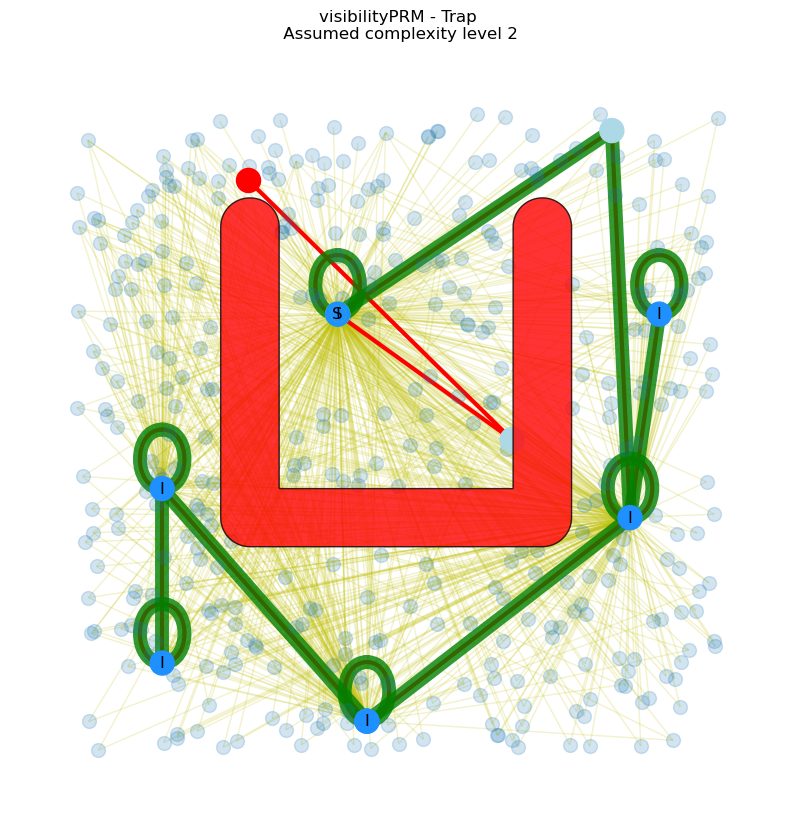

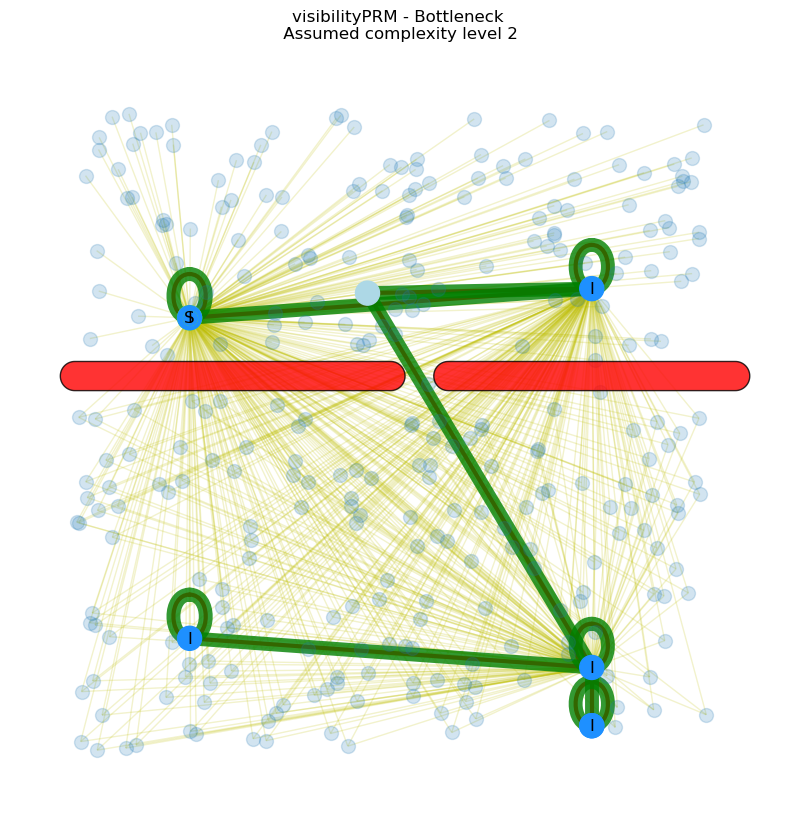

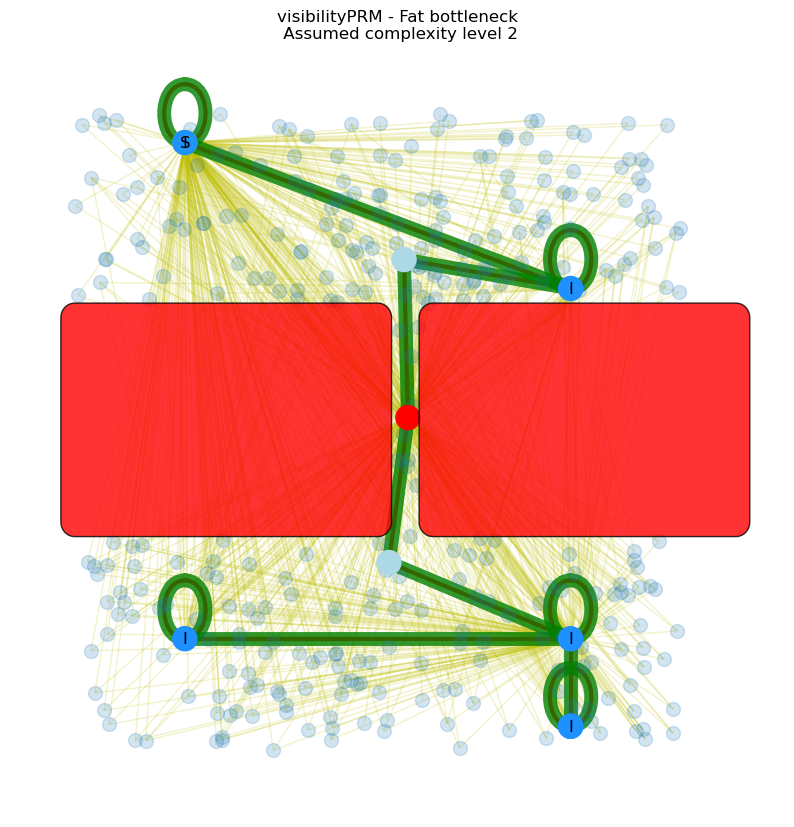

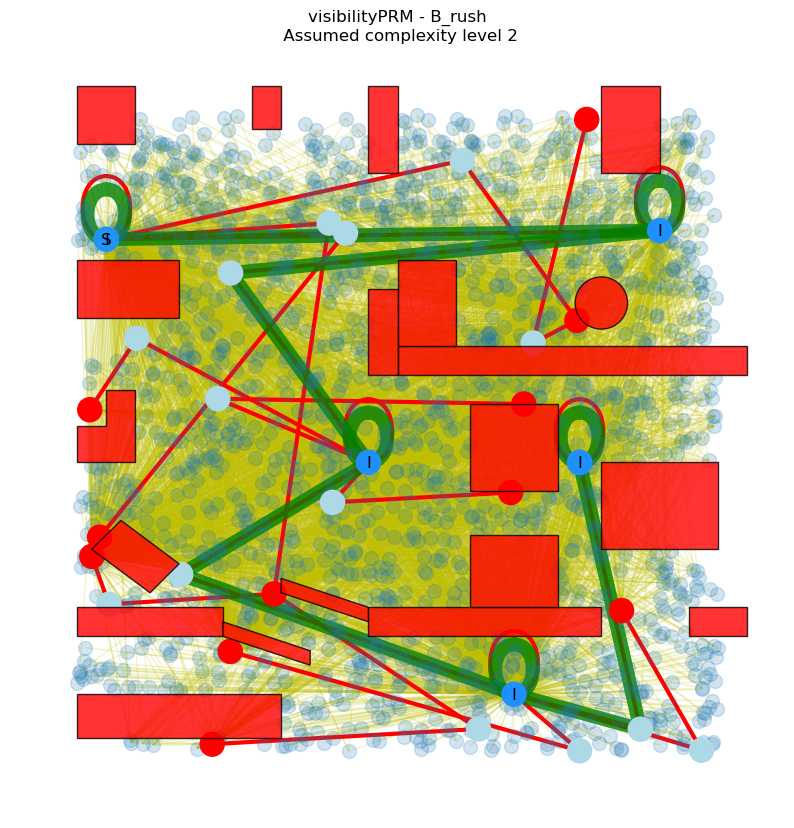

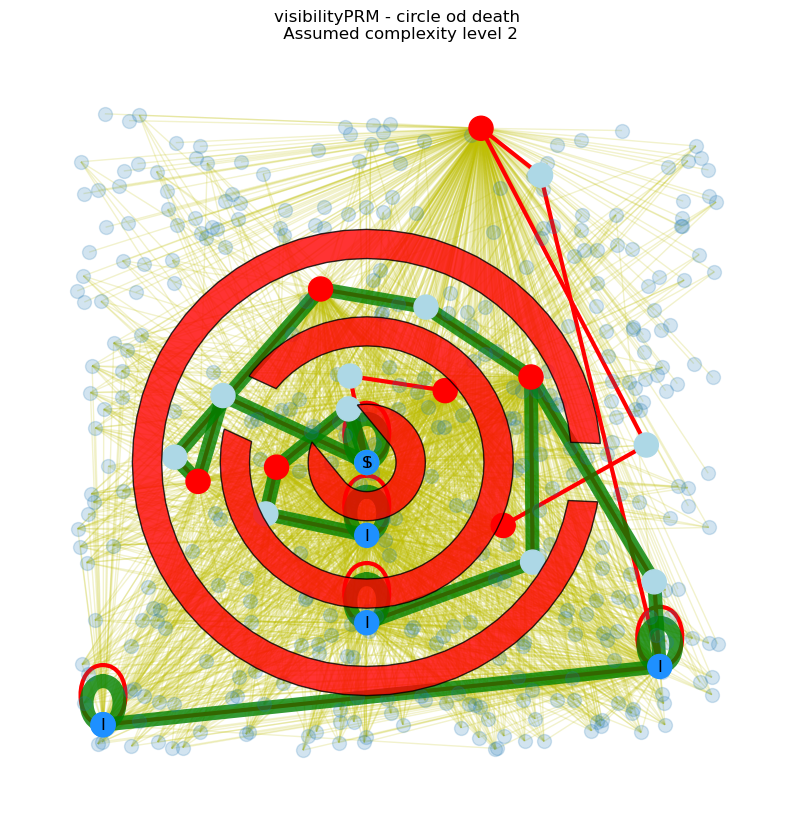

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)


    except Exception as e:
        print ("Error")
        print(e)
        pass
    

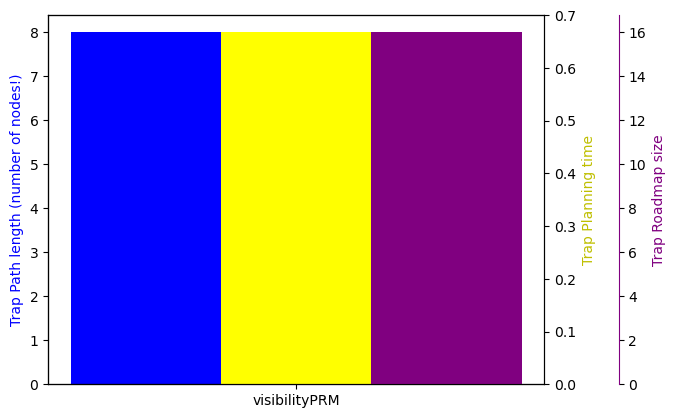

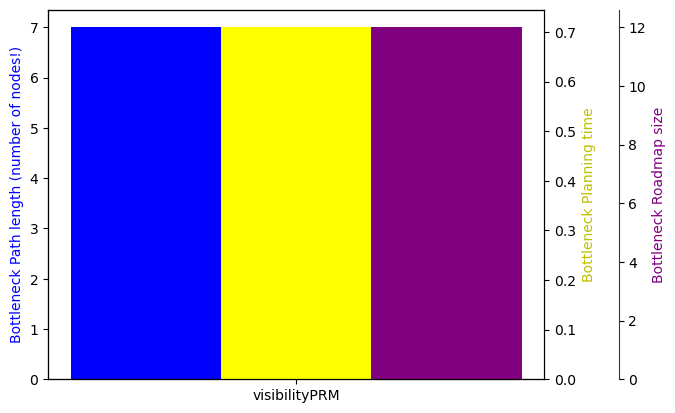

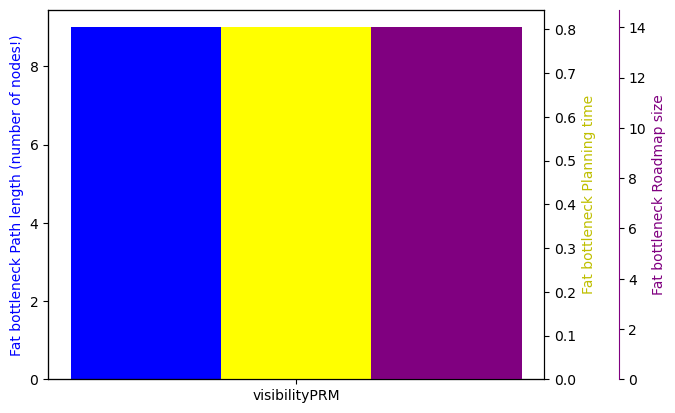

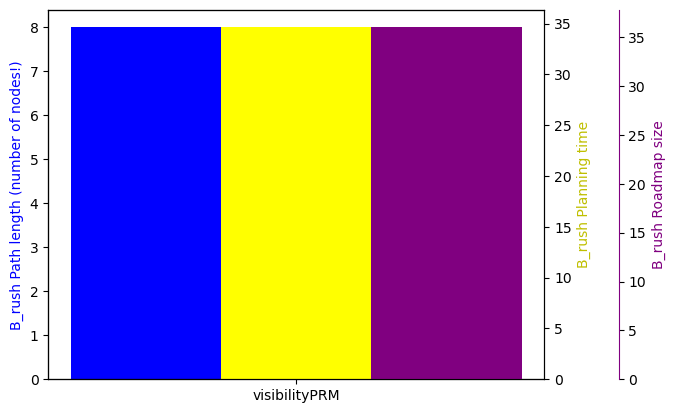

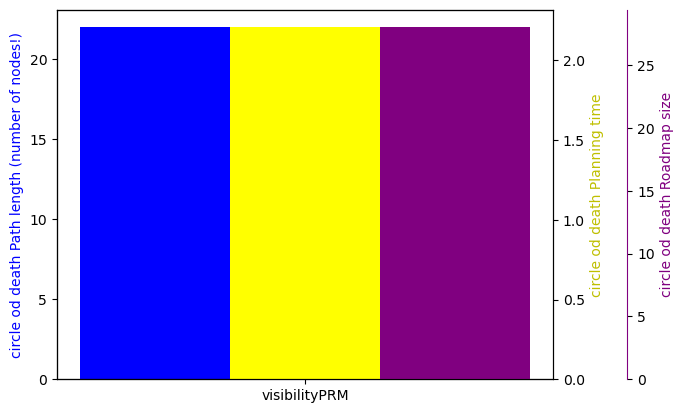

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                               
_checkConnectableInterims  0.030317
_getRandomFreePosition     0.030700
_learnRoadmap              2.108826
_nearestInterim            0.003818
lineInCollision            2.086000
planRoundPath              2.207373
pointInCollision           1.826746

In [12]:
resultBasic = resultList[:5]
resultVisibility = resultList[5:10]
resultLazy = resultList[10:]

In [13]:
'''
import pandas as pd

result_frames = []

for i in range(len(resultBasic)):
    sum_time_Basic = resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]
    sum_time_Visibilty = resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]
    sum_time_Lazy = resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]

    
    # DataFrame erstellen
    data = {
        "Zeit Basic": [sum_time_Basic],
        "Zeit Visibility": [sum_time_Visibilty],
        "Zeit LazyPRM" : [sum_time_Lazy]
    }

    df = pd.DataFrame(data)

    # DataFrame zur Liste hinzufügen
    result_frames.append(df)

final_df = pd.concat(result_frames, ignore_index=True)

# DataFrame in eine Excel-Datei schreiben
final_df.to_excel("Auswertung_alle_3PRMs_.xlsx", index=False)

'''


'\nimport pandas as pd\n\nresult_frames = []\n\nfor i in range(len(resultBasic)):\n    sum_time_Basic = resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]\n    sum_time_Visibilty = resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]\n    sum_time_Lazy = resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"]\n\n    \n    # DataFrame erstellen\n    data = {\n        "Zeit Basic": [sum_time_Basic],\n        "Zeit Visibility": [sum_time_Visibilty],\n        "Zeit LazyPRM" : [sum_time_Lazy]\n    }\n\n    df = pd.DataFrame(data)\n\n    # DataFrame zur Liste hinzufügen\n    result_frames.append(df)\n\nfinal_df = pd.concat(result_frames, ignore_index=True)\n\n# DataFrame in eine Excel-Datei schreiben\nfinal_df.to_excel("Auswertung_alle_3PRMs_.xlsx", index=False)\n\n'

In [14]:
for i in range(len(resultBasic)):
    print(resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"])


2.426633834838867
2.628523349761963
2.9778168201446533
136.60805892944336
8.293780088424683


In [15]:
for i in range(len(resultVisibility)):

    print(resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [16]:
for i in range(len(resultLazy)):

    print(resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [17]:
#result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

In [18]:
#result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]["time"]

In [19]:
#result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)